In [129]:
%reload_ext autoreload

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Import user defined functions.
import parse as prs
import score as sco


# Read and parse json.
subm = pd.read_json('data/test.json')
train= pd.read_json('data/train.json')

# Defining names of the target
target_names = ['high','medium','low']

In [130]:
# A quick look at the test data.
rows = np.random.choice(test.index.values, 5)
sampled_test = test.ix[rows]
sampled_test

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
36707,1.0,2,4ab8052cc4fa455260ddec2f3d1936a1,2016-06-03 05:50:34,"2 Bedroom on Orchard st and Houston, right nex...",Orchard St,"[Dishwasher, No Fee]",40.7223,7105145,-73.9883,c70dac1e7841801c3f8257de18f21561,[https://photos.renthop.com/2/7105145_e935ba2b...,3450,191 Orchard St
49420,1.0,2,73127259259a12c0d8a2ac21db44fd0a,2016-05-07 03:37:17,Totally Renovated Two Bedroom Co-Op In...,Dartmouth,"[Elevator, Cats Allowed]",40.7212,6979450,-73.8562,a6c931997048f055beeefb1a98f480b2,[https://photos.renthop.com/2/6979450_eca0a7c2...,2350,67-30 Dartmouth
93983,1.0,0,b6e23dcf448fcaef1ded4a4fd869b82d,2016-04-22 03:17:43,Building is located just steps from transporta...,W 77 Street,"[Doorman, Elevator, Hardwood Floors]",40.7803,6911213,-73.9761,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/6911213_0cb5f97e...,2680,50 W 77 Street
24103,1.0,0,6e01d34a60782126c24526cf72878117,2016-06-02 06:39:33,Come experience the completely transformed Lon...,Center Boulevard,"[Terrace, Hardwood Floors]",40.7481,7099396,-73.9564,1fa37642bd8ffbffd5dfffb8aeb91215,[https://photos.renthop.com/2/7099396_b0a6515e...,2290,4545 Center Boulevard
78307,1.0,3,fa21c83e114de7fd5cedff34e93f4f1a,2016-05-05 06:08:28,"HOT CHESLEA, OFF HIGH LINE PARK!! FLEX 3-BEDRO...",West 20th Street,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7456,6970281,-74.0053,38d72c692c25ba828c02963a9b17fc72,[https://photos.renthop.com/2/6970281_fefb0b43...,4995,460 West 20th Street


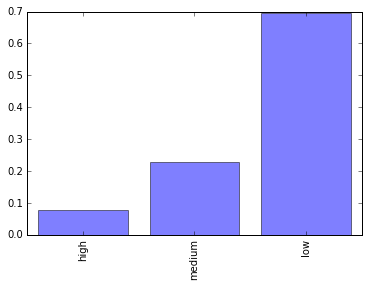

In [131]:
# Proportion of interest level.
prop_interest = []
for interest_name in target_names:
   prop_interest.append(np.float(np.sum(train.interest_level==interest_name))/np.float(np.shape(train)[0]))

# Plotting as graph bar.
y_pos = np.arange(len(target_names))
plt.bar(y_pos, prop_interest, align='center', alpha=0.5)
plt.xticks(y_pos, target_names, rotation='vertical') 
plt.show()

In [132]:
X, y = prs.parse_0(train.copy()),prs.target(train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [133]:
clf = RandomForestClassifier(n_estimators=20)
clf = clf.fit(X_train, y_train)

In [134]:
y_pred = clf.predict(X_test)
score = sco.compute_score(y_test,y_pred)
print(score)

22.7098763685


In [162]:
# Predicting subm data.
X_subm = prs.parse_0(subm.copy())
y_subm = clf.predict(X_subm)
ids = subm['listing_id'].values
#To-do: contatener ids avec y_subm

# Writting the submission file


ValueError: all the input arrays must have same number of dimensions

In [165]:
ids.transpose()

array([7142618, 7210040, 7103890, ..., 6882352, 6884758, 6924212])